In [273]:
import pandas as pd
import numpy as np

In [274]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [275]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

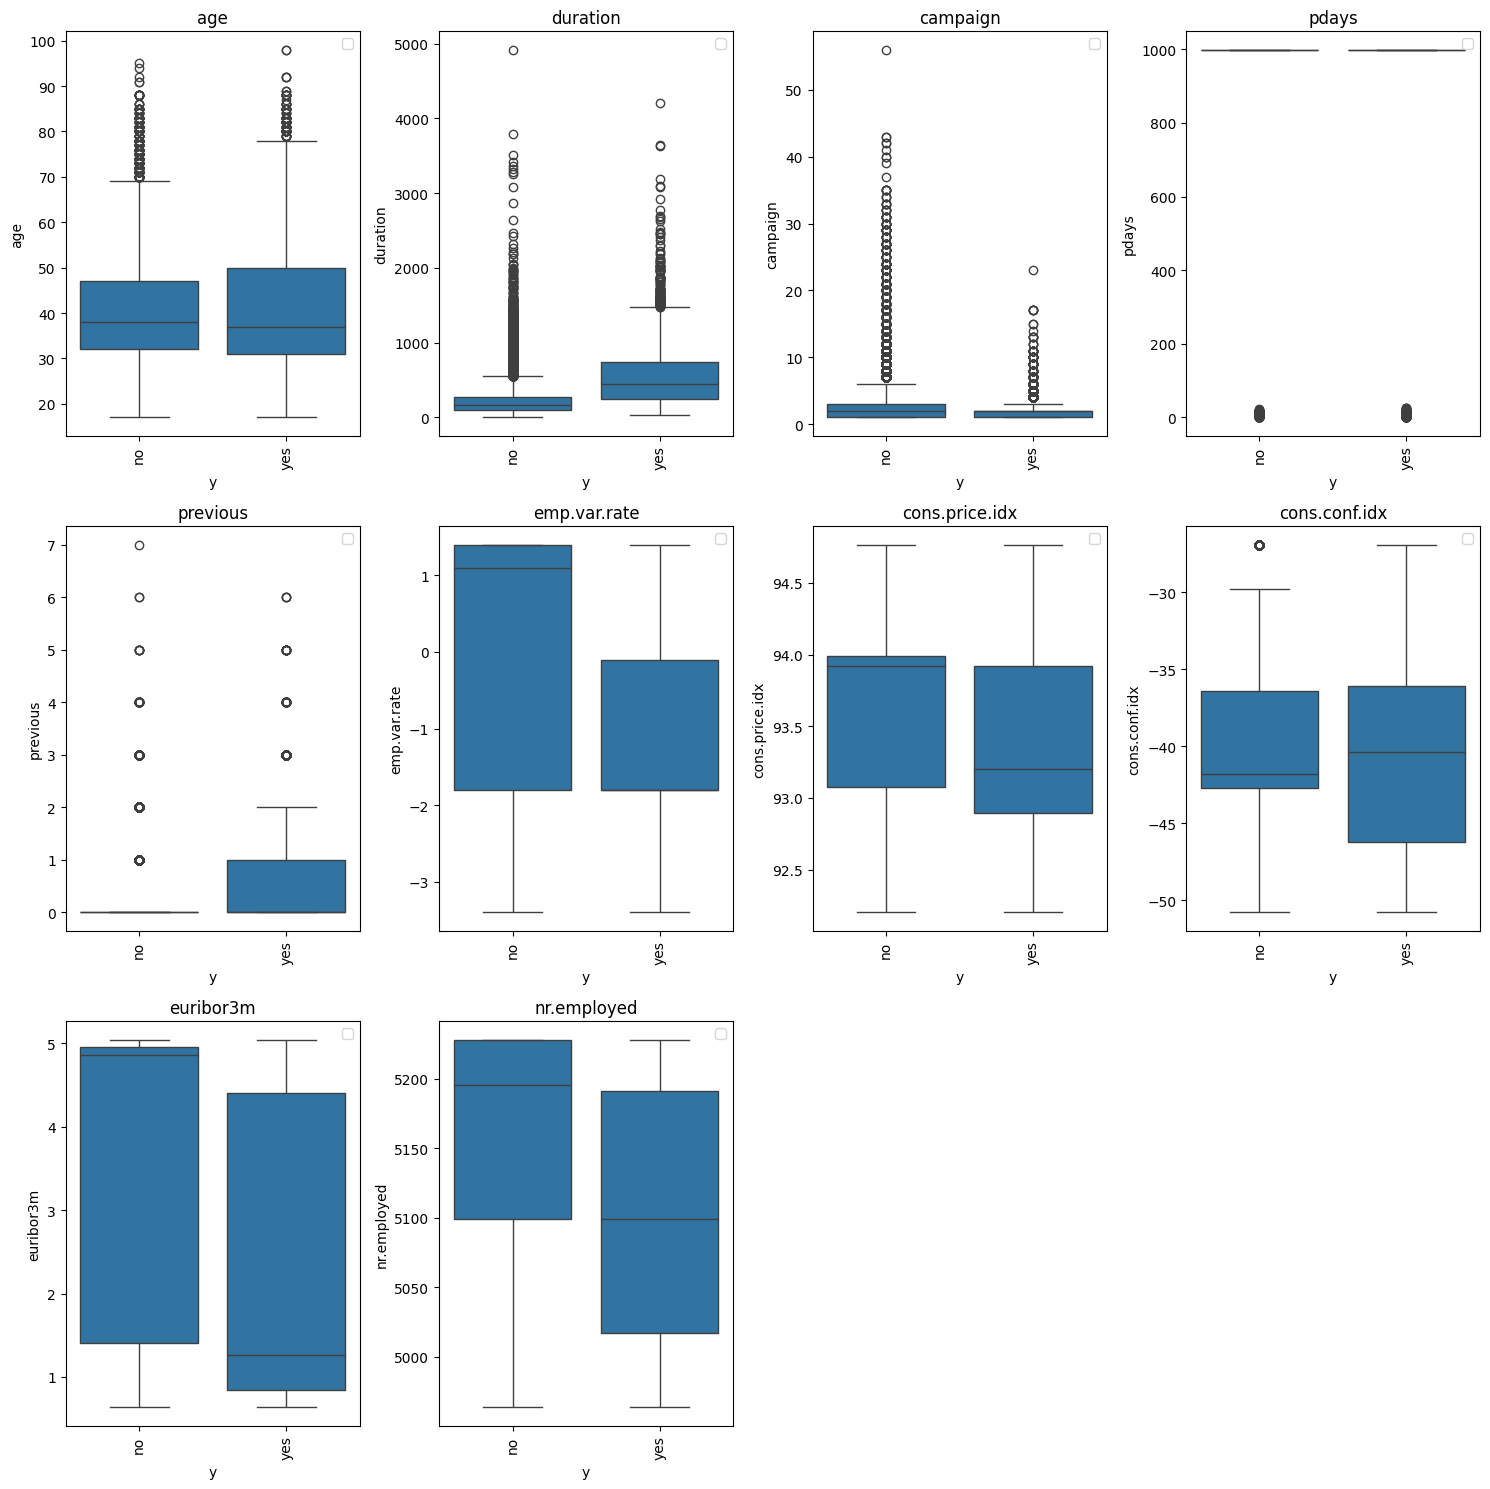

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols=[cname for cname in df.columns if df[cname].dtype in ["int64","float64"]]
categorical_cols=[cname for cname in df.columns if df[cname].dtype in ["object"]]

plt.figure(figsize=(15,15))
for ax, col in enumerate(numerical_cols):
    plt.subplot(3,4, ax+1)
    plt.title(col)
    sns.boxplot(x="y", y=col, data=df)
    plt.xticks(rotation=90)
    plt.legend()

plt.tight_layout()

In [278]:
from scipy import stats

threshold = 3

z_scores = np.abs(stats.zscore(df[numerical_cols]))
df = df[(z_scores < threshold).all(axis=1)]


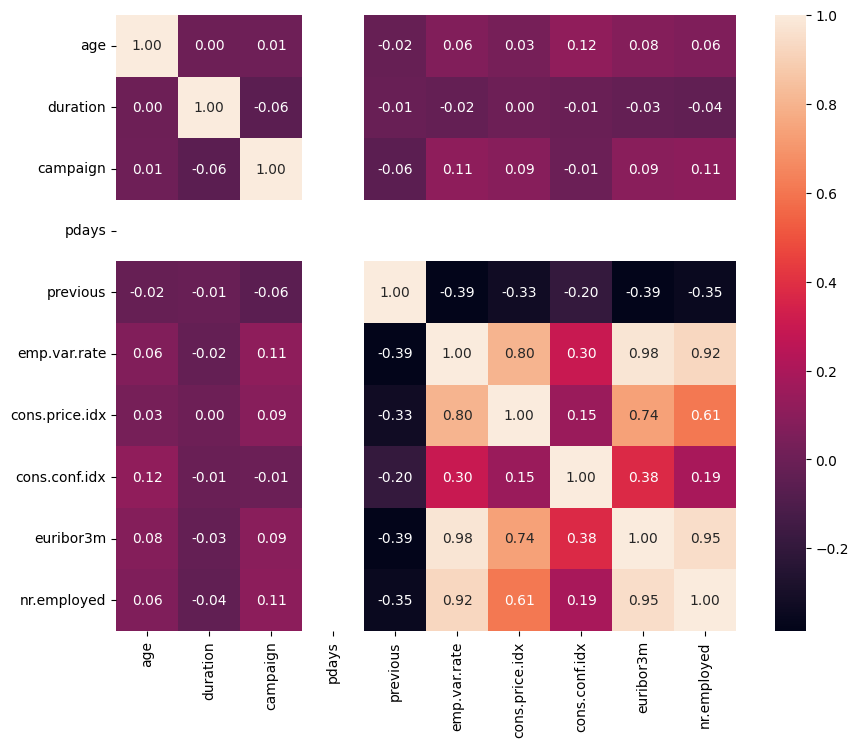

In [279]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(),annot=True,cbar=True,fmt=".2f")
plt.show()

In [280]:
for col in categorical_cols:
    print(f'column {col} the unique values are: {df[col].unique()}')

column job the unique values are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
column marital the unique values are: ['married' 'single' 'divorced' 'unknown']
column education the unique values are: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
column default the unique values are: ['no' 'unknown' 'yes']
column housing the unique values are: ['no' 'yes' 'unknown']
column loan the unique values are: ['no' 'yes' 'unknown']
column contact the unique values are: ['telephone' 'cellular']
column month the unique values are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
column day_of_week the unique values are: ['mon' 'tue' 'wed' 'thu' 'fri']
column poutcome the unique values are: ['nonexistent' 'failure']
column y the unique values are: ['no' 'yes']


In [281]:
df.replace('unknown', np.nan, inplace=True)
df.dropna(inplace=True)

In [282]:
for col in categorical_cols:
    print(f'column {col} the unique values are: {df[col].unique()}')

column job the unique values are: ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed']
column marital the unique values are: ['married' 'single' 'divorced']
column education the unique values are: ['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'illiterate']
column default the unique values are: ['no' 'yes']
column housing the unique values are: ['no' 'yes']
column loan the unique values are: ['no' 'yes']
column contact the unique values are: ['telephone' 'cellular']
column month the unique values are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
column day_of_week the unique values are: ['mon' 'tue' 'wed' 'thu' 'fri']
column poutcome the unique values are: ['nonexistent' 'failure']
column y the unique values are: ['no' 'yes']


In [283]:
m = {"yes":1, "no":0}
df["y"]=df["y"].map(m)

In [284]:
len(categorical_cols)

11

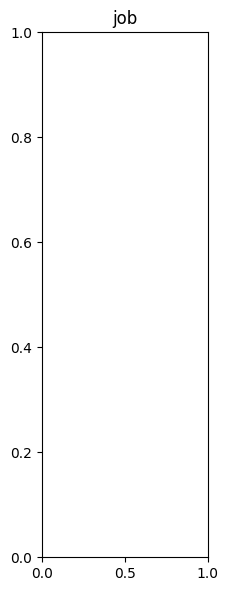

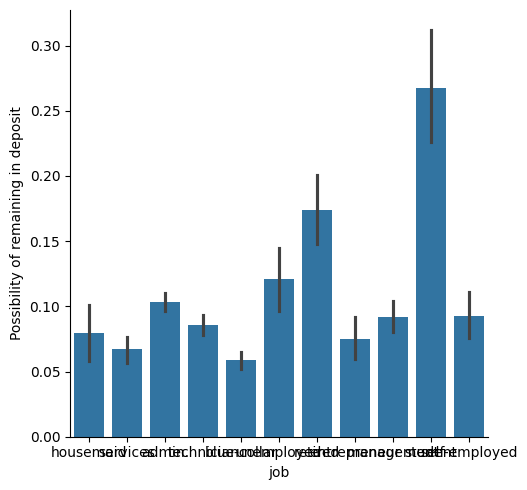

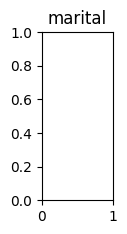

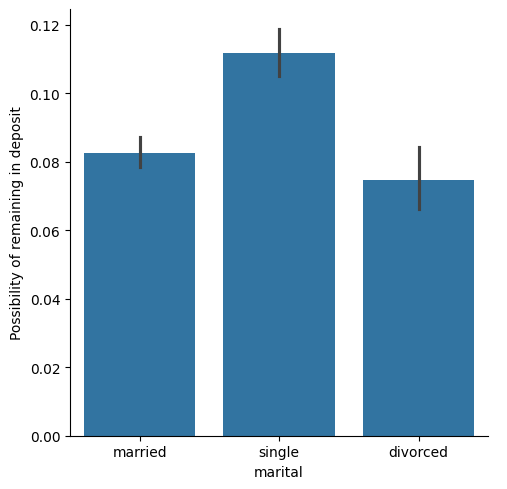

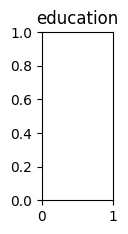

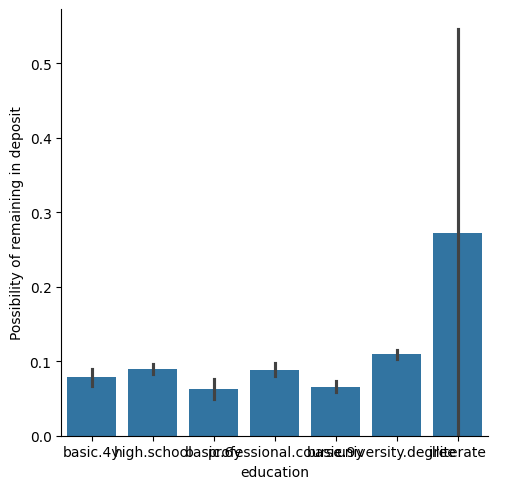

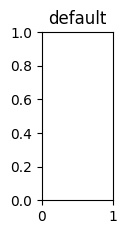

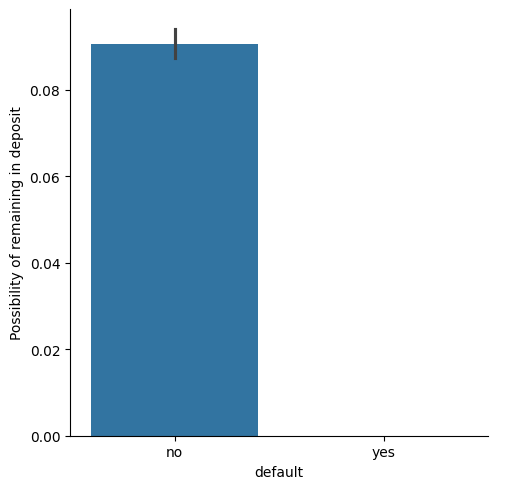

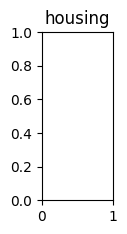

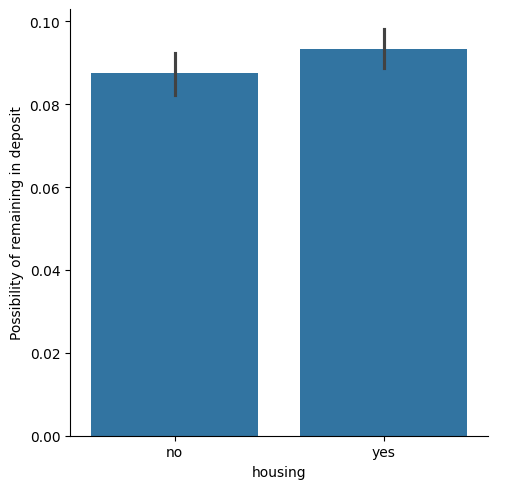

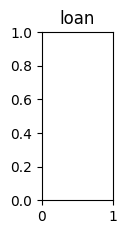

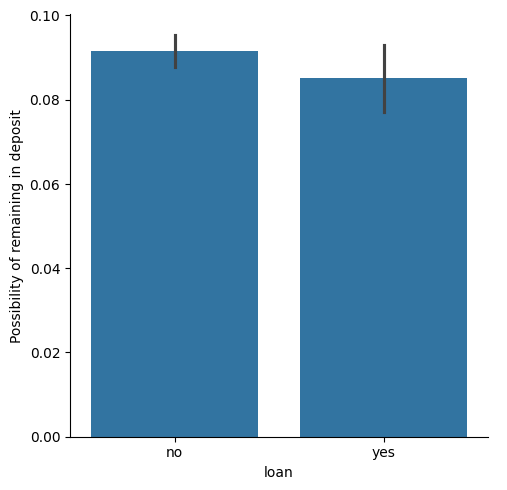

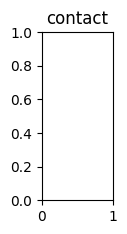

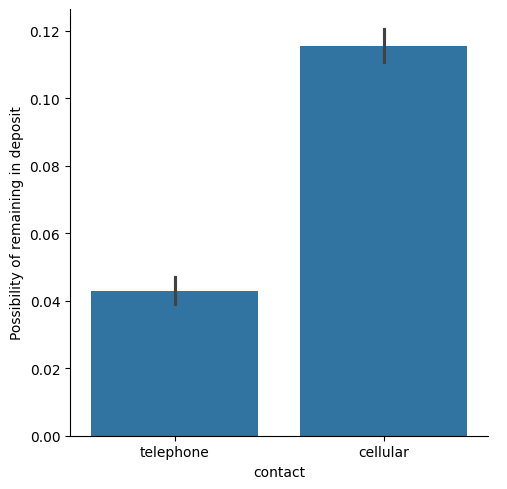

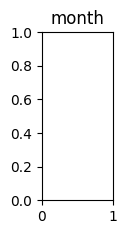

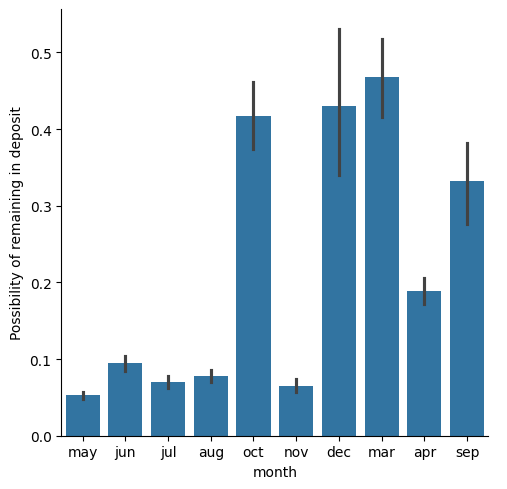

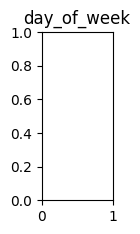

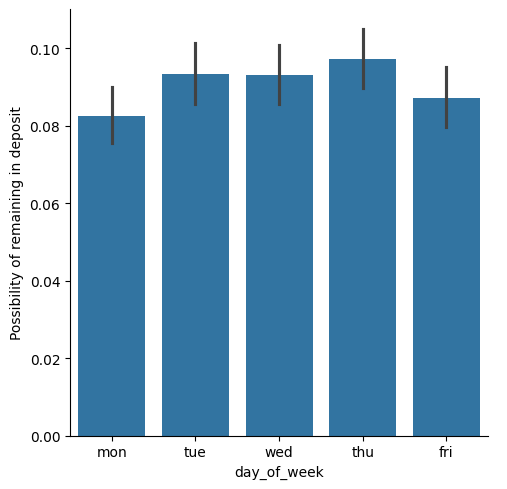

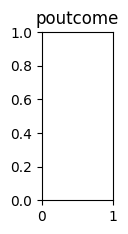

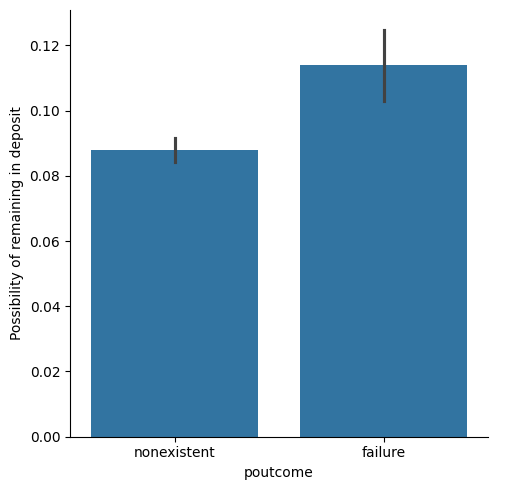

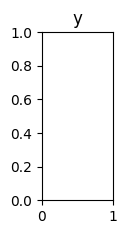

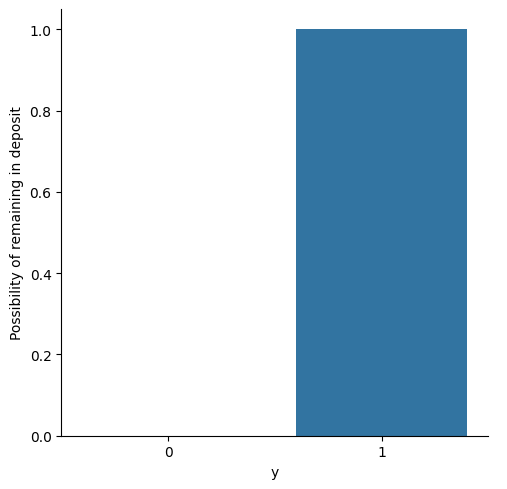

In [285]:
# plt.figure(figsize=(20, 20))
# def cat_plot(x):
#     g=sns.catplot(x=x, y="y", data=df, kind="bar")
#     g.set_ylabels("Possibility of remaining in deposit")
#     g.set_xticklabels()

#     plt.show()

# for i in categorical_cols:
#     cat_plot(i)

plt.figure(figsize=(15,15))
for ax, col in enumerate(categorical_cols):
    plt.subplot(2,6, ax+1)
    plt.title(col)
    g=sns.catplot(x=col, y="y", data=df, kind="bar")
    g.set_ylabels("Possibility of remaining in deposit")
    g.set_xticklabels()
    plt.show()




In [286]:
X = df.drop(columns=["y"])
y = df["y"]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [287]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols.remove('y')

encoder = OrdinalEncoder()

for col in categorical_cols:
    X[col] = X[col].astype("category").cat.codes

X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.845344,3,1,0,0,0,0,1,6,1,0.143890,-0.739175,0.0,-0.343182,1,0.679371,0.819158,0.943042,0.733721,0.330829
2,-0.167512,7,1,3,0,1,0,1,6,1,-0.039587,-0.739175,0.0,-0.343182,1,0.679371,0.819158,0.943042,0.733721,0.330829
3,0.150307,0,1,1,0,0,0,1,6,1,-0.432751,-0.739175,0.0,-0.343182,1,0.679371,0.819158,0.943042,0.733721,0.330829
4,1.845344,7,1,3,0,0,1,1,6,1,0.385031,-0.739175,0.0,-0.343182,1,0.679371,0.819158,0.943042,0.733721,0.330829
6,2.163164,0,1,5,0,0,0,1,6,1,-0.495658,-0.739175,0.0,-0.343182,1,0.679371,0.819158,0.943042,0.733721,0.330829


In [288]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21935, 20)
(21935,)
(5484, 20)
(5484,)


Epoch 1/100


c:\Users\MaiElBaradei\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


549/549 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8278 - loss: 0.4728 - val_accuracy: 0.9090 - val_loss: 0.2064
Epoch 2/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9057 - loss: 0.2445 - val_accuracy: 0.9116 - val_loss: 0.1975
Epoch 3/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9128 - loss: 0.2200 - val_accuracy: 0.9157 - val_loss: 0.1934
Epoch 4/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9130 - loss: 0.2055 - val_accuracy: 0.9127 - val_loss: 0.1916
Epoch 5/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9150 - loss: 0.2006 - val_accuracy: 0.9152 - val_loss: 0.1930
Epoch 6/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9134 - loss: 0.1962 - val_accuracy: 0.9157 - val_loss: 0.1928
Epoch 7/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9175 - loss: 0.1901 - val_accuracy: 0.9161 - val_loss: 0.1902
Epoch 8/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9152 - loss: 0.1991 - val_accuracy: 0.9166

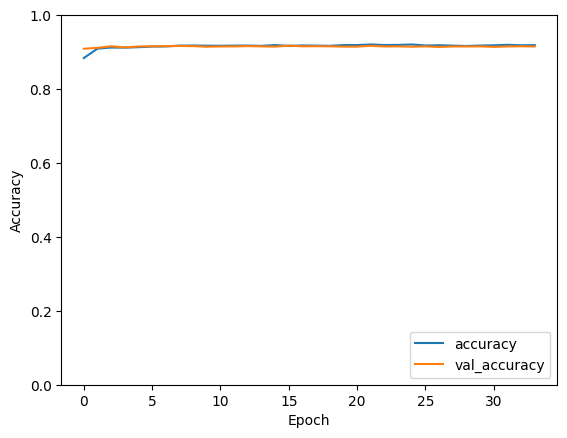

In [289]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping])

plt.plot(history.history['accuracy'], label='accuracy')

plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.ylim([0, 1])

plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

plt.show()



172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


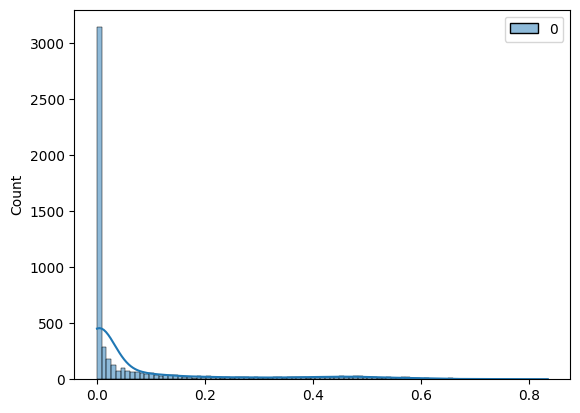

In [290]:
y_pred_proba = model.predict(X_test)

sns.histplot(y_pred_proba, kde=True)
plt.show()

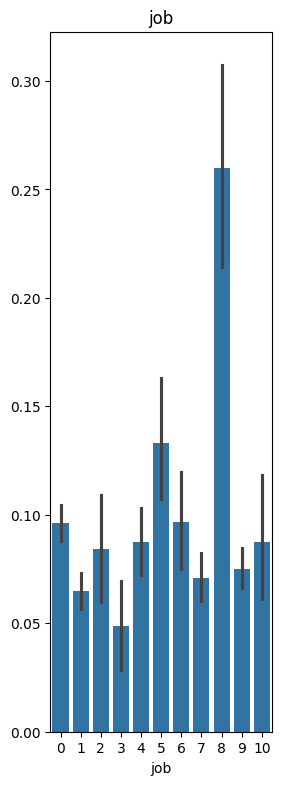

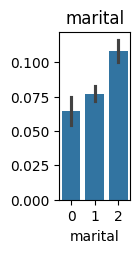

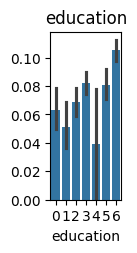

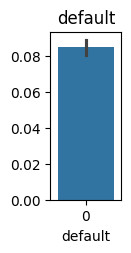

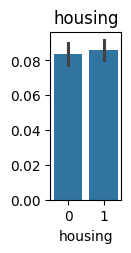

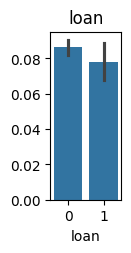

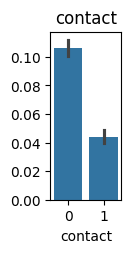

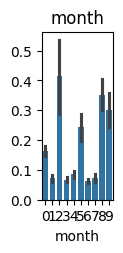

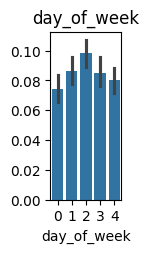

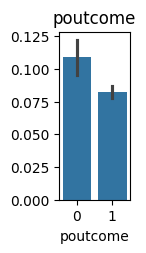

In [296]:

plt.figure(figsize=(20,20))
for ax, col in enumerate(categorical_cols):
    
    plt.subplot(2,6, ax+1)
    plt.title(col)
    sns.barplot(x = X_test[col], y = y_pred_proba.flatten())
    g.set_ylabels("Possibility of remaining in deposit")
    g.set_xticklabels()
    plt.show()

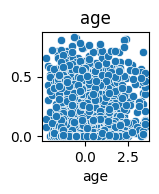

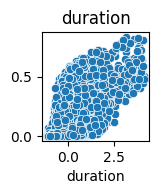

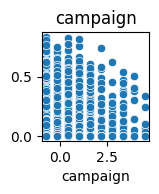

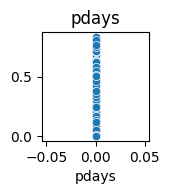

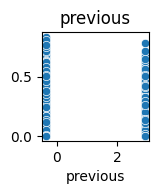

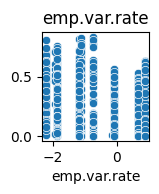

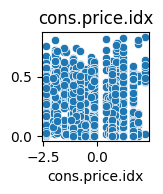

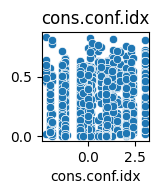

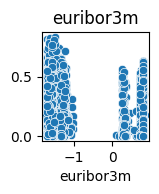

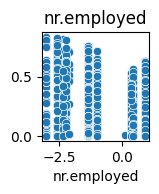

In [301]:
figuresize=(20,25)
for ax, col in enumerate(numerical_cols):
    plt.subplot(3,4, ax+1)
    plt.title(col)
    sns.scatterplot(x = X_test[col], y = y_pred_proba.flatten())
    plt.show()

Based on the market segmentation analysis, we have identified three distinct market segments: Low, Medium, and High. Here are some recommendations for targeted marketing strategies, product development, and other business strategies that could benefit from understanding these segments:

Targeted Marketing Strategies:

- Low Segment: This segment represents customers with lower engagement and response rates. To target this segment effectively, consider offering cost-effective products or services, discounts, and promotions to attract price-sensitive customers. Focus on channels such as email marketing, direct mail, and targeted online advertising.
- Medium Segment: This segment represents customers with moderate engagement and response rates. To target this segment effectively, emphasize the value proposition of your products or services. Highlight features, benefits, and quality to appeal to customers who are willing to spend more for better value. Utilize a mix of online and offline marketing channels, including social media, content marketing, and targeted events.
- High Segment: This segment represents customers with high engagement and response rates. To target this segment effectively, focus on providing premium products or services that cater to their specific needs and preferences. Offer personalized experiences, exclusive offers, and superior customer service. Leverage high-end marketing channels such as luxury magazines, influencer partnerships, and VIP events.

